In [1]:
# source: http://contrib.scikit-learn.org/metric-learn/auto_examples/plot_metric_learning_examples.html
%matplotlib inline
!pip install -U metric-learn


## Algorithms walkthrough

This is a small walkthrough which illustrates most of the Metric Learning
algorithms implemented in metric-learn by using them on synthetic data,
with some visualizations to provide intuitions into what they are designed
to achieve.


In [2]:
# License: BSD 3 clause
# Authors: Bhargav Srinivasa Desikan <bhargavvader@gmail.com>
#          William de Vazelhes <wdevazelhes@gmail.com>

Imports





In [3]:
from sklearn.manifold import TSNE

import metric_learn
import numpy as np
from sklearn.datasets import make_classification, make_regression

# visualisation imports
import matplotlib.pyplot as plt
np.random.seed(42)

### Loading our dataset and setting up plotting


We will be using a synthetic dataset to illustrate the plotting,
using the function `sklearn.datasets.make_classification` from
scikit-learn. The dataset will contain:
  - 100 points in 3 classes with 2 clusters per class
  - 5 features, among which 3 are informative (correlated with the class
    labels) and two are random noise with large magnitude



In [4]:
X, y = make_classification(n_samples=100, n_classes=3, n_clusters_per_class=2,
                           n_informative=3, class_sep=4., n_features=5,
                           n_redundant=0, shuffle=True,
                           scale=[1, 1, 20, 20, 20])

Note that the dimensionality of the data is 5, so to plot the
transformed data in 2D, we will use the t-sne algorithm. (See
`sklearn.manifold.TSNE`).



In [5]:
def plot_tsne(X, y, colormap=plt.cm.Paired):
    plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)

    plt.xticks(())
    plt.yticks(())

    plt.show()

Let's now plot the dataset as is.



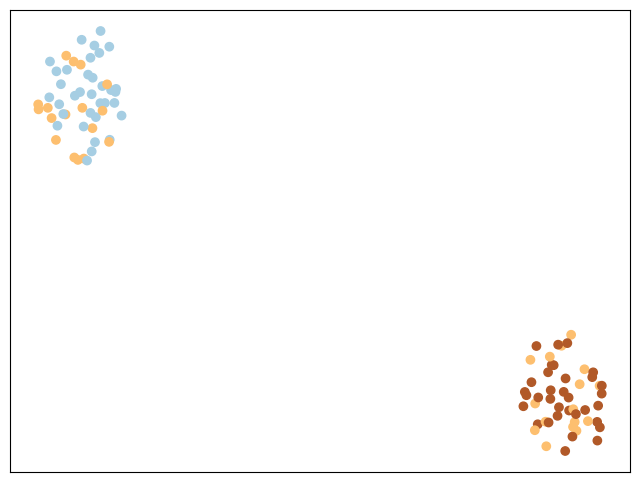

In [6]:
plot_tsne(X, y)

We can see that the classes appear mixed up: this is because t-sne
is based on preserving the original neighborhood of points in the embedding
space, but this original neighborhood is based on the euclidean
distance in the input space, in which the contribution of the noisy
features is high. So even if points from the same class are close to each
other in some subspace of the input space, this is not the case when
considering all dimensions of the input space.

### Metric Learning


Why is Metric Learning useful? We can, with prior knowledge of which
points are supposed to be closer, figure out a better way to compute
distances between points for the task at hand. Especially in higher
dimensions when Euclidean distances are a poor way to measure distance, this
becomes very useful.

Basically, we learn this distance:

$$D(x, x') = \sqrt{(x-x')^\top M(x-x')}$$

And we learn the parameters
$M$ of this distance to satisfy certain constraints on the distance
between points, for example requiring that points of the same class are
close together and points of different class are far away.

For more information, 
cf https://arxiv.org/pdf/1306.6709.pdf> 
We will briefly explain the metric learning algorithms implemented by
metric-learn, before providing some examples for its usage, and also
discuss how to perform metric learning with weaker supervision than class
labels.

Metric-learn can be easily integrated with your other machine learning
pipelines, and follows scikit-learn conventions.




### Large Margin Nearest Neighbour


LMNN is a metric learning algorithm primarily designed for k-nearest
neighbor classification. The algorithm is based on semidefinite
programming, a sub-class of convex programming (as most Metric Learning
algorithms are).

The main intuition behind LMNN is to learn a pseudometric under which
all data instances in the training set are surrounded by at least k
instances that share the same class label. If this is achieved, the
leave-one-out error (a special case of cross validation) is minimized.
You'll notice that the points from the same labels are closer together,
but they are not necessary in a same cluster. This is particular to LMNN
and we'll see that some other algorithms implicitly enforce points from
the same class to cluster together.

- See more in the http://contrib.scikit-learn.org/metric-learn/supervised.html#lmnn



Fit and then transform!
-----------------------




In [7]:
# setting up LMNN
lmnn = metric_learn.LMNN(k=5, learn_rate=1e-6)

# fit the data!
lmnn.fit(X, y)

# transform our input space
X_lmnn = lmnn.transform(X)

/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/metric_learn/lmnn.py:140: FutureWarning: "num_chunks" parameter has been renamed to "n_chunks". It has been deprecated in version 0.6.3 and will be removed in 0.7.0
  warnings.warn('"num_chunks" parameter has been renamed to'
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.1

So what have we learned? The matrix $M$ we talked about before.



Now let us plot the transformed space - this tells us what the original
space looks like after being transformed with the new learned metric.




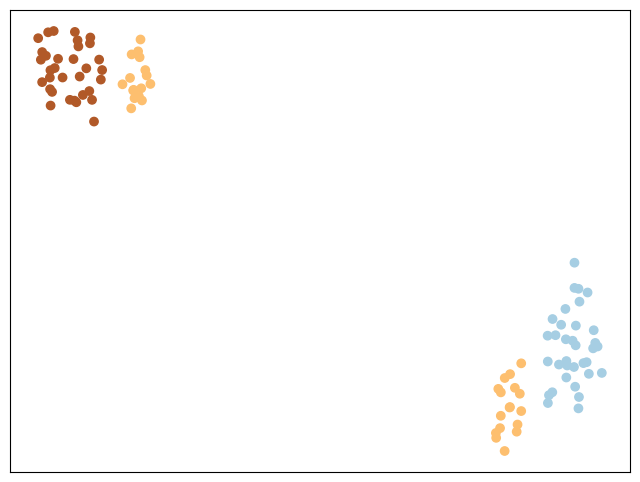

In [8]:
plot_tsne(X_lmnn, y)

Pretty neat, huh?

The rest of this notebook will briefly explain the other Metric Learning
algorithms before plotting them. Also, while we have first run ``fit``
and then ``transform`` to see our data transformed, we can also use
``fit_transform``. The rest of the examples and illustrations will use
``fit_transform``.



### Information Theoretic Metric Learning

ITML uses a regularizer that automatically enforces a Semi-Definite
Positive Matrix condition - the LogDet divergence. It uses soft
must-link or cannot-link constraints, and a simple algorithm based on
Bregman projections. Unlike LMNN, ITML will implicitly enforce points from
the same class to belong to the same cluster, as you can see below.



/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force

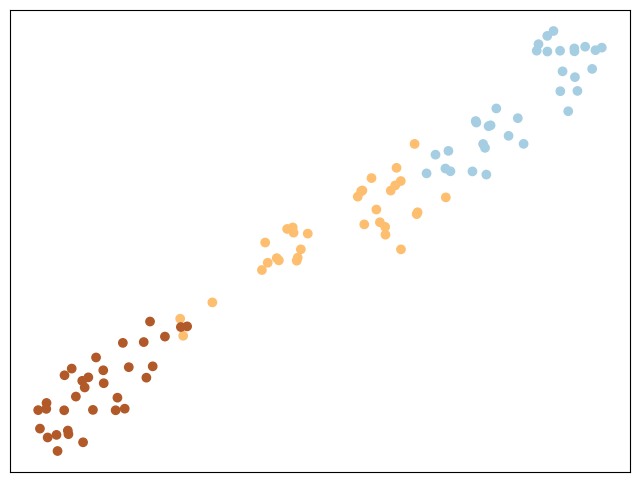

In [13]:
itml = metric_learn.ITML_Supervised()
X_itml = itml.fit_transform(X, y)
    
plot_tsne(X_itml, y)

### Mahalanobis Metric for Clustering

MMC is an algorithm that will try to minimize the distance between similar
points, while ensuring that the sum of distances between dissimilar points is
higher than a threshold. This is done by optimizing a cost function
subject to an inequality constraint.




/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force

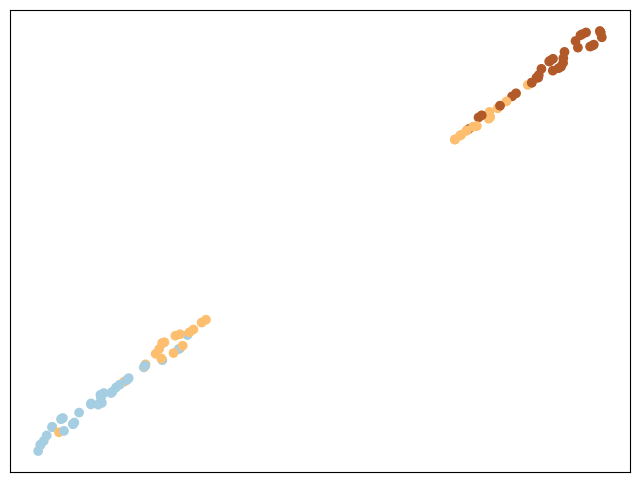

In [10]:
mmc = metric_learn.MMC_Supervised()
X_mmc = mmc.fit_transform(X, y)

plot_tsne(X_mmc, y)

### Sparse Determinant Metric Learning

Implements an efficient sparse metric learning algorithm in high
dimensional space via an $l_1$-penalized log-determinant
regularization. Compared to the most existing distance metric learning
algorithms, the algorithm exploits the sparsity nature underlying the
intrinsic high dimensional feature space.





In [12]:
sdml = metric_learn.SDML_Supervised(sparsity_param=0.1, balance_param=0.0015,
                                    prior='covariance')
X_sdml = sdml.fit_transform(X, y)

plot_tsne(X_sdml, y)

/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RuntimeError: There was a problem in SDML when using scikit-learn's graphical lasso solver. skggm's graphical lasso can sometimes converge on non SPD cases where scikit-learn's graphical lasso fails to converge. Try to install skggm and rerun the algorithm (see the README.md for the right version of skggm). The following error message was thrown: got an unexpected keyword argument 'cov_init'.

### Least Squares Metric Learning

LSML is a simple, yet effective, algorithm that learns a Mahalanobis
metric from a given set of relative comparisons. This is done by
formulating and minimizing a convex loss function that corresponds to
the sum of squared hinge loss of violated constraints.




/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force

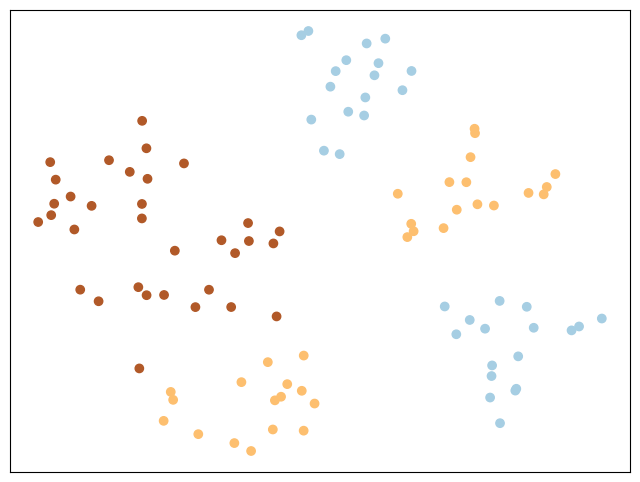

In [24]:
lsml = metric_learn.LSML_Supervised(tol=0.0001, max_iter=10000,
                                    prior='covariance')
X_lsml = lsml.fit_transform(X, y)

plot_tsne(X_lsml, y)

### Neighborhood Components Analysis

NCA is an extremly popular metric learning algorithm.

Neighborhood components analysis aims at "learning" a distance metric
by finding a linear transformation of input data such that the average
leave-one-out (LOO) classification performance of a soft-nearest
neighbors rule is maximized in the transformed space. The key insight to
the algorithm is that a matrix $A$ corresponding to the
transformation can be found by defining a differentiable objective function
for $A$, followed by use of an iterative solver such as
`scipy.optimize.fmin_l_bfgs_b`. Like LMNN, this algorithm does not try to
cluster points from the same class in a unique cluster, because it
enforces conditions at a local neighborhood scale.




/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


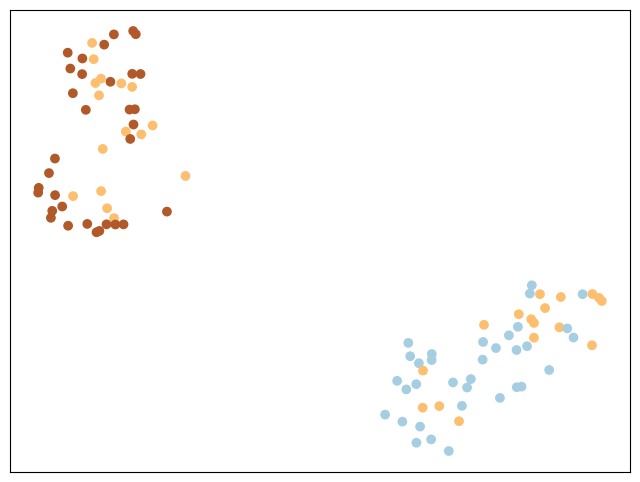

In [14]:
nca = metric_learn.NCA(max_iter=1000)
X_nca = nca.fit_transform(X, y)

plot_tsne(X_nca, y)

### Local Fisher Discriminant Analysis

LFDA is a linear supervised dimensionality reduction method. It is
particularly useful when dealing with multimodality, where one ore more
classes consist of separate clusters in input space. The core
optimization problem of LFDA is solved as a generalized eigenvalue
problem. Like LMNN, and NCA, this algorithm does not try to cluster points
from the same class in a unique cluster.



/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


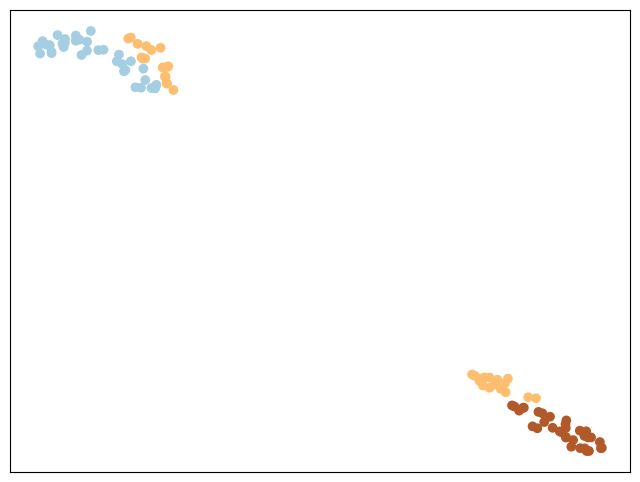

In [15]:
lfda = metric_learn.LFDA(k=2, n_components=2)
X_lfda = lfda.fit_transform(X, y)

plot_tsne(X_lfda, y)

### Relative Components Analysis

RCA is another one of the older algorithms. It learns a full rank
Mahalanobis distance metric based on a weighted sum of in-class
covariance matrices. It applies a global linear transformation to assign
large weights to relevant dimensions and low weights to irrelevant
dimensions. Those relevant dimensions are estimated using "chunklets",
subsets of points that are known to belong to the same class.





/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/metric_learn/rca.py:183: FutureWarning: "num_chunks" parameter has been renamed to "n_chunks". It has been deprecated in version 0.6.3 and will be removed in 0.7.0
  warnings.warn('"num_chunks" parameter has been renamed to'
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10

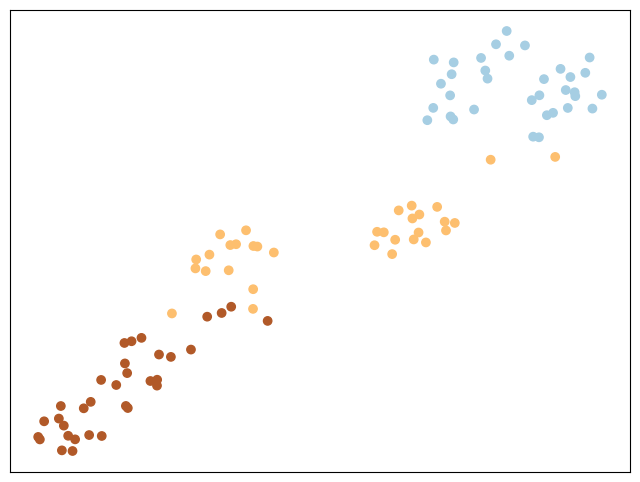

In [16]:
rca = metric_learn.RCA_Supervised(num_chunks=30, chunk_size=2)
X_rca = rca.fit_transform(X, y)

plot_tsne(X_rca, y)

### Regression example: Metric Learning for Kernel Regression


The previous algorithms took as input a dataset with class labels. Metric
learning can also be useful for regression, when the labels are real numbers.
An algorithm very similar to NCA but for regression is Metric
Learning for Kernel Regression (MLKR). It will optimize for the average
leave-one-out *regression* performance from a soft-nearest neighbors
regression.



To illustrate MLKR, let's use the dataset
`sklearn.datasets.make_regression` the same way as we did with the
classification  before. The dataset will contain: 100 points of 5 features
each, among which 3 are informative (i.e., used to generate the
regression target from a linear model), and two are random noise with the
same magnitude.



In [17]:
X_reg, y_reg = make_regression(n_samples=100, n_informative=3, n_features=5,
                               shuffle=True)

Let's plot the dataset as is



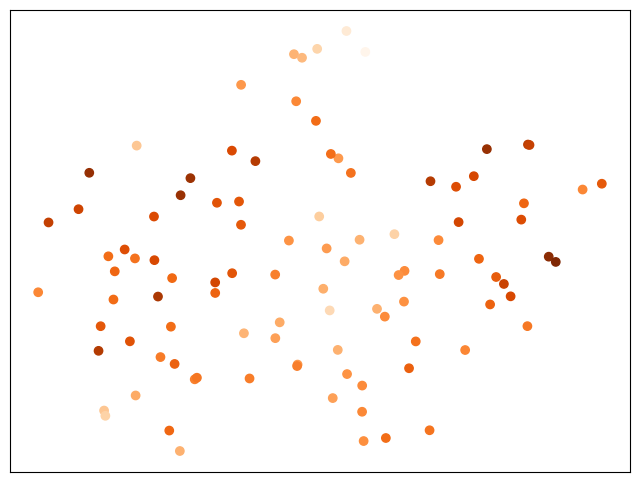

In [18]:
plot_tsne(X_reg, y_reg, plt.cm.Oranges)

And let's plot the dataset after transformation by MLKR:



/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


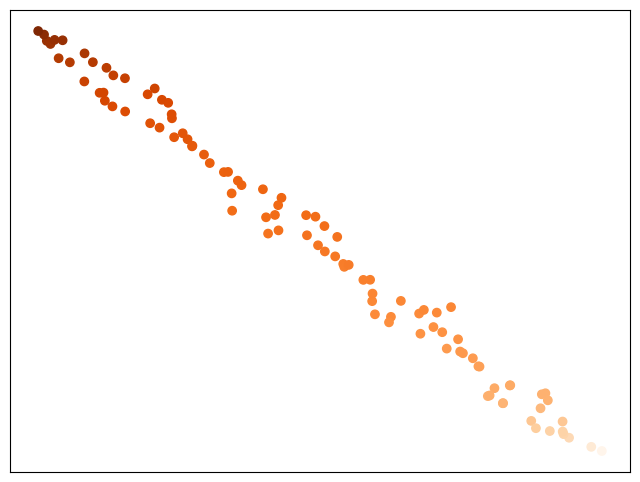

In [19]:
mlkr = metric_learn.MLKR()
X_mlkr = mlkr.fit_transform(X_reg, y_reg)
plot_tsne(X_mlkr, y_reg, plt.cm.Oranges)

Points that have the same value to regress are now closer to each
other ! This would improve the performance of
`sklearn.neighbors.KNeighborsRegressor` for instance.



### Metric Learning from Weaker Supervision

To learn the metric, so far we have always given the labels of the
data to supervise the algorithms. However, in many applications,
it is easier to obtain information about whether two samples are
similar or dissimilar. For instance, when annotating a dataset of face
images, it is easier for an annotator to tell if two faces belong to the same
person or not, rather than finding the ID of the face among a huge database
of every person's faces.

Note that for some problems (e.g., in information
retrieval where the goal is to rank documents by similarity to a query
document), there is no notion of individual label but one can gather
information on which pairs of points are similar or dissimilar.
Fortunately, one of the strength of metric learning is the ability to
learn from such weaker supervision. Indeed, some of the algorithms we've
used above have alternate ways to pass some supervision about the metric
we want to learn. 

The way to go is to pass a 2D array `pairs` of pairs,
as well as an array of labels `pairs_labels` such that 

for each `i` between
`0` and `n_pairs` 

we want `X[pairs[i, 0], :]` and `X[pairs[i, 1], :]` to be
similar if `pairs_labels[i] == 1`,

and we want them to be dissimilar if
`pairs_labels[i] == -1`. 

In other words, we
want to enforce a metric that projects similar points closer together and
dissimilar points further away from each other. This kind of input is
possible for ITML, SDML, and MMC. See `weakly_supervised_section` for
details on other kinds of weak supervision that some algorithms can work
with.

For the purpose of this example, we're going to explicitly create these
pairwise constraints through the labels we have, i.e. `y`.
Do keep in mind that we are doing this method because we know the labels
- we can actually create the constraints any way we want to depending on
the data!

Note that this is what metric-learn did under the hood in the previous
examples (do check out the
`constraints` module!) - but we'll try our own version of this. We're
going to go ahead and assume that two points labeled the same will be
closer than two points in different labels.



In [20]:
def create_constraints(labels):
    import itertools
    import random

    # aggregate indices of same class
    zeros = np.where(y == 0)[0]
    ones = np.where(y == 1)[0]
    twos = np.where(y == 2)[0]
    # make permutations of all those points in the same class
    zeros_ = list(itertools.combinations(zeros, 2))
    ones_ = list(itertools.combinations(ones, 2))
    twos_ = list(itertools.combinations(twos, 2))
    # put them together!
    sim = np.array(zeros_ + ones_ + twos_)

    # similarily, put together indices in different classes
    dis = []
    for zero in zeros:
        for one in ones:
            dis.append((zero, one))
        for two in twos:
            dis.append((zero, two))
    for one in ones:
        for two in twos:
            dis.append((one, two))

    # pick up just enough dissimilar examples as we have similar examples
    dis = np.array(random.sample(dis, len(sim)))

    # return an array of pairs of indices of shape=(2*len(sim), 2), and the
    # corresponding labels, array of shape=(2*len(sim))
    # Each pair of similar points have a label of +1 and each pair of
    # dissimilar points have a label of -1
    return (np.vstack([np.column_stack([sim[:, 0], sim[:, 1]]),
                       np.column_stack([dis[:, 0], dis[:, 1]])]),
            np.concatenate([np.ones(len(sim)), -np.ones(len(sim))]))


pairs, pairs_labels = create_constraints(y)

Now that we've created our constraints, let's see what it looks like!




In [21]:
print(pairs)
print(pairs_labels)

[[ 0  6]
 [ 0  9]
 [ 0 10]
 ...
 [ 6 26]
 [58 76]
 [55  3]]
[ 1.  1.  1. ... -1. -1. -1.]


Using our constraints, let's now train ITML again. Note that we are no
longer calling the supervised class :py:class:`ITML_Supervised
<metric_learn.ITML_Supervised>` but the more generic
(weakly-supervised) :py:class:`ITML <metric_learn.ITML>`, which
takes the dataset `X` through the `preprocessor` argument (see
`this section  <preprocessor_section>` of the documentation to learn
about more advanced uses of `preprocessor`) and the pair information `pairs`
and `pairs_labels` in the fit method.



/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force

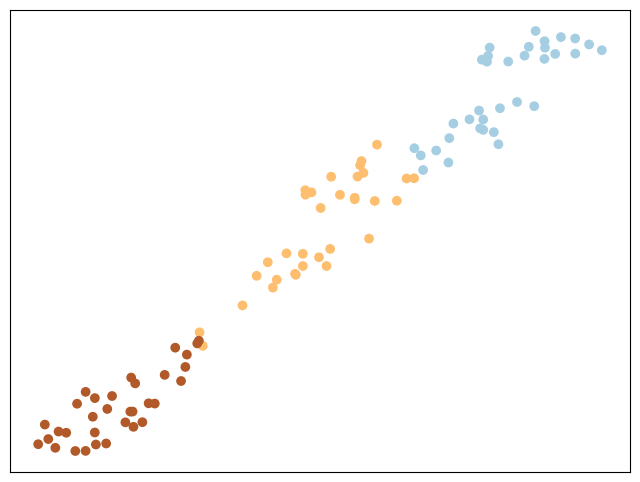

In [23]:
itml = metric_learn.ITML(preprocessor=X)
itml.fit(pairs, pairs_labels)

X_itml = itml.transform(X)

plot_tsne(X_itml, y)

And that's the result of ITML after being trained on our manually
constructed constraints! A bit different from our old result, but not too
different.

RCA and LSML also have their own specific ways of taking in inputs -
it's worth one's while to poke around in the constraints.py file to see
how exactly this is going on.

Finally, one of the main advantages of metric-learn is its out-of-the box
compatibility with scikit-learn, for doing `model selection
<https://scikit-learn.org/stable/model_selection.html>`__,
cross-validation, and scoring for instance. Indeed, supervised algorithms are
regular `sklearn.base.TransformerMixin` that can be plugged into any
pipeline or cross-validation procedure. And weakly-supervised estimators are
also compatible with scikit-learn, since their input dataset format described
above allows to be sliced along the first dimension when doing
cross-validations (see also this `section <sklearn_compat_ws>`). You
can also look at some `use cases <use_cases>` where you could combine
metric-learn with scikit-learn estimators.



This brings us to the end of this tutorial! Have fun Metric Learning :)

